In [9]:
%matplotlib notebook
import plotly.express as px
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np

In [10]:
df_2017 = pd.read_csv("Data/df_2017.csv")
df_2017.head()

,Unnamed: 0,Country name,Code,year,GDP,Happiness Index,Log GDP,Social support,Healthy life exp,Freedom,...,Pct Poverty,Pct spent ed,Literacy rate,Tourist arrivals,Rev tourism,Fragile index,Security index,brain drain,Unemployment rate,continent
0,0,Afghanistan,AFG,2017,2203.0,2.66,7.47,0.49,52.8,0.43,...,NaN,15.66,NaN,NaN,16.0,17.3,1.0,8.2,11.18,Asia
1,1,Albania,ALB,2017,13094.0,4.64,9.38,0.64,68.4,0.75,...,NaN,12.39,NaN,4643.0,2050.0,6.5,4.7,7.6,13.75,Europe
2,2,Argentina,ARG,2017,23563.0,6.04,9.85,0.91,68.6,0.83,...,25.7,13.26,NaN,6711.0,5835.0,48.2,4.3,3.0,8.35,Americas
3,3,Armenia,ARM,2017,12115.0,4.29,9.08,0.70,66.6,0.61,...,25.7,10.40,99.74,1495.0,1140.0,71.0,5.5,6.2,17.70,Asia
4,4,Australia,AUS,2017,48905.0,7.26,10.71,0.95,73.3,0.91,...,NaN,NaN,NaN,8815.0,43975.0,22.3,2.1,1.3,5.59,Oceania


In [11]:
df_2017_v2 = df_2017[["Country name", "Code","continent", "year","Happiness Index", "GDP", "Social support", "Freedom", "Healthy life exp", "Generosity", "Sleep (min)", "Literacy rate", "Rev tourism","Average Age", "Tourist arrivals", "Blue Index", "Suicide", "Pct spent ed", "Depression & Anxiety", "Substance Abuse", "Physician perpop", "Unemployment rate", "Pct corruption", "Pct Poverty", "Fragile index ", "Security index", "brain drain" ]]
df_2017_v2.head()

,Country name,Code,continent,year,Happiness Index,GDP,Social support,Freedom,Healthy life exp,Generosity,...,Pct spent ed,Depression & Anxiety,Substance Abuse,Physician perpop,Unemployment rate,Pct corruption,Pct Poverty,Fragile index,Security index,brain drain
0,Afghanistan,AFG,Asia,2017,2.66,2203.0,0.49,0.43,52.8,-0.11,...,15.66,4279.0,521.797725,2.4356,11.18,0.95,NaN,17.3,1.0,8.2
1,Albania,ALB,Europe,2017,4.64,13094.0,0.64,0.75,68.4,-0.03,...,12.39,2898.0,1080.730870,2.4356,13.75,0.88,NaN,6.5,4.7,7.6
2,Argentina,ARG,Americas,2017,6.04,23563.0,0.91,0.83,68.6,-0.18,...,13.26,4117.0,851.924597,2.4356,8.35,0.84,25.7,48.2,4.3,3.0
3,Armenia,ARM,Asia,2017,4.29,12115.0,0.70,0.61,66.6,-0.13,...,10.40,3296.0,1161.792104,3.9901,17.70,0.86,25.7,71.0,5.5,6.2
4,Australia,AUS,Oceania,2017,7.26,48905.0,0.95,0.91,73.3,0.31,...,NaN,5396.0,810.016527,4.4023,5.59,0.41,NaN,22.3,2.1,1.3


In [12]:
df_2017_v3 = df_2017_v2.rename(columns={"continent":"Continent","Happiness Index":"Happiness index", "year":"Year", "Healthy life exp":"Life exp","Physician perpop": "Physician per pop","Substance Abuse": "Substance abuse", "Blue Index":"Blue index", "Pct spent ed":"% Spent edu", "Pct corruption":"% Corruption", "Pct Poverty":"% Poverty","Unemployment rate":"% Unemployment","brain drain": "Brain drain" })
df_2017_v3.head()

,Country name,Code,Continent,Year,Happiness index,GDP,Social support,Freedom,Life exp,Generosity,...,% Spent edu,Depression & Anxiety,Substance abuse,Physician per pop,% Unemployment,% Corruption,% Poverty,Fragile index,Security index,Brain drain
0,Afghanistan,AFG,Asia,2017,2.66,2203.0,0.49,0.43,52.8,-0.11,...,15.66,4279.0,521.797725,2.4356,11.18,0.95,NaN,17.3,1.0,8.2
1,Albania,ALB,Europe,2017,4.64,13094.0,0.64,0.75,68.4,-0.03,...,12.39,2898.0,1080.730870,2.4356,13.75,0.88,NaN,6.5,4.7,7.6
2,Argentina,ARG,Americas,2017,6.04,23563.0,0.91,0.83,68.6,-0.18,...,13.26,4117.0,851.924597,2.4356,8.35,0.84,25.7,48.2,4.3,3.0
3,Armenia,ARM,Asia,2017,4.29,12115.0,0.70,0.61,66.6,-0.13,...,10.40,3296.0,1161.792104,3.9901,17.70,0.86,25.7,71.0,5.5,6.2
4,Australia,AUS,Oceania,2017,7.26,48905.0,0.95,0.91,73.3,0.31,...,NaN,5396.0,810.016527,4.4023,5.59,0.41,NaN,22.3,2.1,1.3


<IPython.core.display.Javascript object>


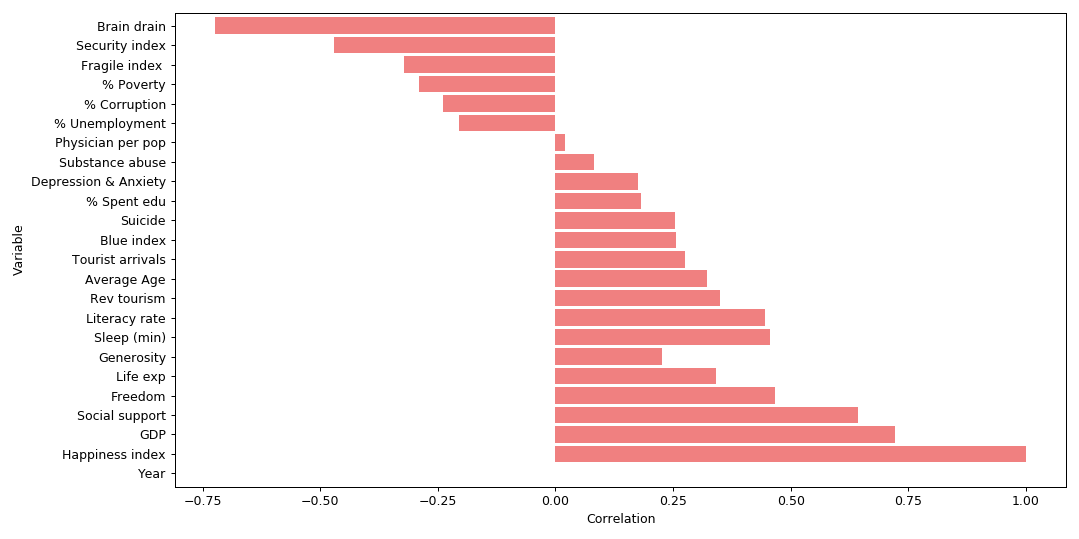

In [20]:
df_corr = df_2017_v3.corr()
corr_barh = df_corr["Happiness index"].plot(kind="barh",width=0.85,figsize=(12, 6),color="lightcoral")

corr_barh.set_ylabel("Variable", size=10)
corr_barh.set_xlabel("Correlation", size=10)
plt.tight_layout()

plt.show()
plt.savefig("images/Fig_Q4.png")


